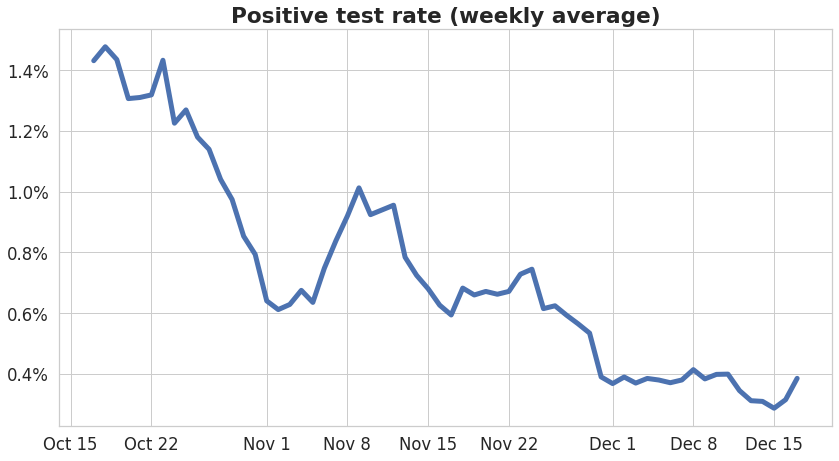

In [32]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, matplotlib.ticker as ticker, matplotlib.dates as mdates
sns.set(style="whitegrid", font_scale=1.5)

data = pd.read_csv("caseData.csv", usecols=[0, 1, 10], parse_dates=["date"])
data = data.dropna()
data = data[data["tests"] > 0]
data["test_rate"] = data["new"] / (data["new"] + data["tests"])
for i in data.index:
    date = data.at[i, "date"]
    d = data[(data["date"] <= date) & (data["date"] > (date - pd.Timedelta(days=7)))]
    average = d["test_rate"].sum() / len(d)    
    data.at[i, "test_rate_avg"] = average

fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)
sns.lineplot(data=data[data["date"] > pd.Timestamp("2021-10-16")], ax=ax, x="date", y="test_rate_avg", lw=5)
plt.xlabel(None)
plt.ylabel(None)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %-d"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, 1))
plt.title("Positive test rate (weekly average)", fontweight="bold", fontsize="large")
plt.savefig("test_rate.jpg")